<a href="https://colab.research.google.com/github/Akshay-S-12/LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [ ]:
train=df.iloc[:156]
train


,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [ ]:
test=df.iloc[156:]
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [ ]:
df.shape

(168, 1)

In [ ]:
df.dtypes

,0
Production,int64


In [ ]:
df.isna().sum()

,0
Production,0


<Axes: xlabel='Date'>

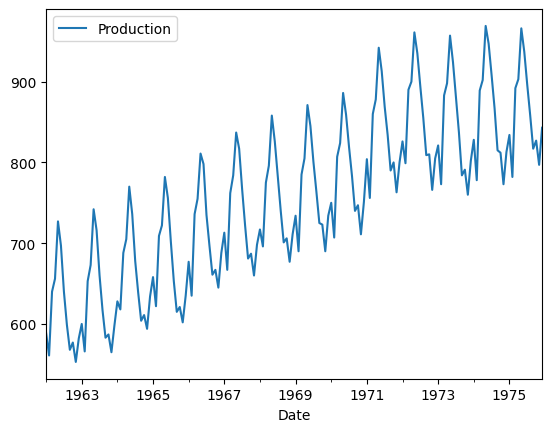

In [ ]:
df.plot()

In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train)
scaler_train=scaler.transform(train)
scaler_test=scaler.transform(test)

In [ ]:
scaler_train[:15]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462]])

In [ ]:
#TimeSeriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator



In [ ]:
n_input=12
n_feature=1
generator=TimeseriesGenerator(scaler_train,scaler_train,length=n_input,batch_size=1)
generator

In [ ]:
generator[0]

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         [0.24759615],
         [0.41826923],
         [0.34615385],
         [0.20913462],
         [0.11057692],
         [0.03605769],
         [0.05769231],
         [0.        ],
         [0.06971154]]]),
 array([[0.11298077]]))

In [ ]:
from keras.models import Sequential  #Models
from keras.layers import Dense,LSTM

In [ ]:
model=Sequential()
model.add(LSTM (100,activation='relu',input_shape=(12,1)))
model.add(Dense(1)) #output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
r=model.fit(generator,epochs=50)
r

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0908
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0204
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0169
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0143
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0087
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0090
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0086
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0040
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0037
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0040
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0037
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0042
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.004

In [ ]:
r.history

{'loss': [0.0474231131374836,
  0.021804187446832657,
  0.01535751111805439,
  0.010603100061416626,
  0.007611964363604784,
  0.0081751998513937,
  0.00756229879334569,
  0.004645544569939375,
  0.0037784602027386427,
  0.0033869959879666567,
  0.00372417364269495,
  0.0055685341358184814,
  0.0056264083832502365,
  0.0036087867338210344,
  0.0038108201697468758,
  0.0038154327776283026,
  0.0036004753783345222,
  0.0032034022733569145,
  0.003219401463866234,
  0.0037464601919054985,
  0.0035124479327350855,
  0.0038252121303230524,
  0.003188665024936199,
  0.00411625811830163,
  0.0033791284076869488,
  0.0033018235117197037,
  0.003106597810983658,
  0.003324301214888692,
  0.0036940621212124825,
  0.00287144398316741,
  0.0028322278521955013,
  0.002581713953986764,
  0.00370647176168859,
  0.0036081646103411913,
  0.0026990226469933987,
  0.00232355366460979,
  0.00267465366050601,
  0.00302746775560081,
  0.002415258903056383,
  0.0025666840374469757,
  0.002462383359670639,
  

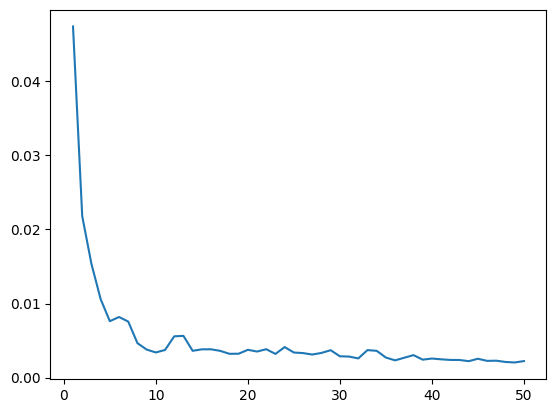

In [ ]:
plt.plot(range(1,51),r.history['loss'])

In [ ]:
test_predictions=[]
first_eval_batch=scaler_train[-12:]
current_batch=first_eval_batch.reshape(1,12,1)
for i in range(len(scaler_test)):
  #print(current_batch)
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  #print(test_predictions)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [ ]:
test_predictions #sclaed data

[array([0.64613575], dtype=float32),
 array([0.63517076], dtype=float32),
 array([0.80715966], dtype=float32),
 array([0.88017154], dtype=float32),
 array([0.98930573], dtype=float32),
 array([0.97187966], dtype=float32),
 array([0.9016421], dtype=float32),
 array([0.8011861], dtype=float32),
 array([0.6867469], dtype=float32),
 array([0.63957775], dtype=float32),
 array([0.5890191], dtype=float32),
 array([0.623916], dtype=float32)]

In [ ]:
scaler_test

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [ ]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [ ]:
true_prediction=scaler.inverse_transform(test_predictions)
true_prediction

array([[821.79247093],
       [817.23103523],
       [888.77841949],
       [919.15135956],
       [964.55118561],
       [957.30193901],
       [928.08310699],
       [886.29341125],
       [838.68670845],
       [819.0643425 ],
       [798.03195381],
       [812.54904366]])

In [ ]:
test['Predicted_value']=true_prediction


/tmp/ipython-input-2772382160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted_value']=true_prediction
/tmp/ipython-input-2772382160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Prediction_value',axis=1,inplace=True)


In [ ]:
test

,Production,Predicted_value
Date,,
1975-01-01,834,821.792471
1975-02-01,782,817.231035
1975-03-01,892,888.778419
1975-04-01,903,919.151360
1975-05-01,966,964.551186
1975-06-01,937,957.301939
1975-07-01,896,928.083107
1975-08-01,858,886.293411
1975-09-01,817,838.686708


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
per=mean_absolute_percentage_error(test['Production'],test['Predicted_value'])
per

0.020557878579200828

In [ ]:
r2=r2_score(test['Production'],test['Predicted_value'])
r2

0.8475597222467859